**Target:**

- Make the model lighter, parameters < 8k

**Results:**

- Parameters: 7.27k
- Best Training Accuracy: 98.31
- Best Test Accuracy: 98.53

**Analysis:**

- No over-fitting
- Receptive field before GAP is only 18
- Will add one more layer in end before GAP in next step


In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net3
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6            [-1, 8, 12, 12]             128
              ReLU-7            [-1, 8, 12, 12]               0
            Conv2d-8           [-1, 16, 10, 10]           1,152
              ReLU-9           [-1, 16, 10, 10]               0
           Conv2d-10             [-1, 16, 8, 8]           2,304
             ReLU-11             [-1, 16, 8, 8]               0
           Conv2d-12             [-1, 16, 6, 6]           2,304
             ReLU-13             [-1, 16, 6, 6]               0
AdaptiveAvgPool2d-14             [-1, 1

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=2.2270 Batch_id=468 Accuracy=10.77: 100%|██████████| 469/469 [00:18<00:00, 25.10it/s]


Test set: Average loss: 2.2365, Accuracy: 2953/10000 (29.53%)

Epoch 2


Train: Loss=0.4174 Batch_id=468 Accuracy=73.59: 100%|██████████| 469/469 [00:18<00:00, 25.57it/s]


Test set: Average loss: 0.2289, Accuracy: 9288/10000 (92.88%)

Epoch 3


Train: Loss=0.2580 Batch_id=468 Accuracy=92.84: 100%|██████████| 469/469 [00:18<00:00, 25.15it/s]


Test set: Average loss: 0.1714, Accuracy: 9435/10000 (94.35%)

Epoch 4


Train: Loss=0.1002 Batch_id=468 Accuracy=94.65: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]


Test set: Average loss: 0.1215, Accuracy: 9609/10000 (96.09%)

Epoch 5


Train: Loss=0.2097 Batch_id=468 Accuracy=95.80: 100%|██████████| 469/469 [00:18<00:00, 25.47it/s]


Test set: Average loss: 0.1116, Accuracy: 9654/10000 (96.54%)

Epoch 6


Train: Loss=0.1666 Batch_id=468 Accuracy=96.49: 100%|██████████| 469/469 [00:18<00:00, 25.41it/s]


Test set: Average loss: 0.1227, Accuracy: 9602/10000 (96.02%)

Epoch 7


Train: Loss=0.0758 Batch_id=468 Accuracy=96.82: 100%|██████████| 469/469 [00:19<00:00, 24.36it/s]


Test set: Average loss: 0.0761, Accuracy: 9756/10000 (97.56%)

Epoch 8


Train: Loss=0.1125 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:19<00:00, 24.47it/s]


Test set: Average loss: 0.0885, Accuracy: 9723/10000 (97.23%)

Epoch 9


Train: Loss=0.1461 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:18<00:00, 25.42it/s]


Test set: Average loss: 0.0632, Accuracy: 9789/10000 (97.89%)

Epoch 10


Train: Loss=0.0095 Batch_id=468 Accuracy=97.62: 100%|██████████| 469/469 [00:18<00:00, 25.07it/s]


Test set: Average loss: 0.0603, Accuracy: 9816/10000 (98.16%)

Epoch 11


Train: Loss=0.0682 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:19<00:00, 24.28it/s]


Test set: Average loss: 0.0946, Accuracy: 9723/10000 (97.23%)

Epoch 12


Train: Loss=0.0441 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:18<00:00, 25.23it/s]


Test set: Average loss: 0.0548, Accuracy: 9829/10000 (98.29%)

Epoch 13


Train: Loss=0.0501 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:18<00:00, 25.46it/s]


Test set: Average loss: 0.0584, Accuracy: 9822/10000 (98.22%)

Epoch 14


Train: Loss=0.0383 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:19<00:00, 24.22it/s]


Test set: Average loss: 0.0598, Accuracy: 9804/10000 (98.04%)

Epoch 15


Train: Loss=0.0845 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:19<00:00, 24.18it/s]


Test set: Average loss: 0.0486, Accuracy: 9853/10000 (98.53%)



Text(0.5, 1.0, 'Test Accuracy')

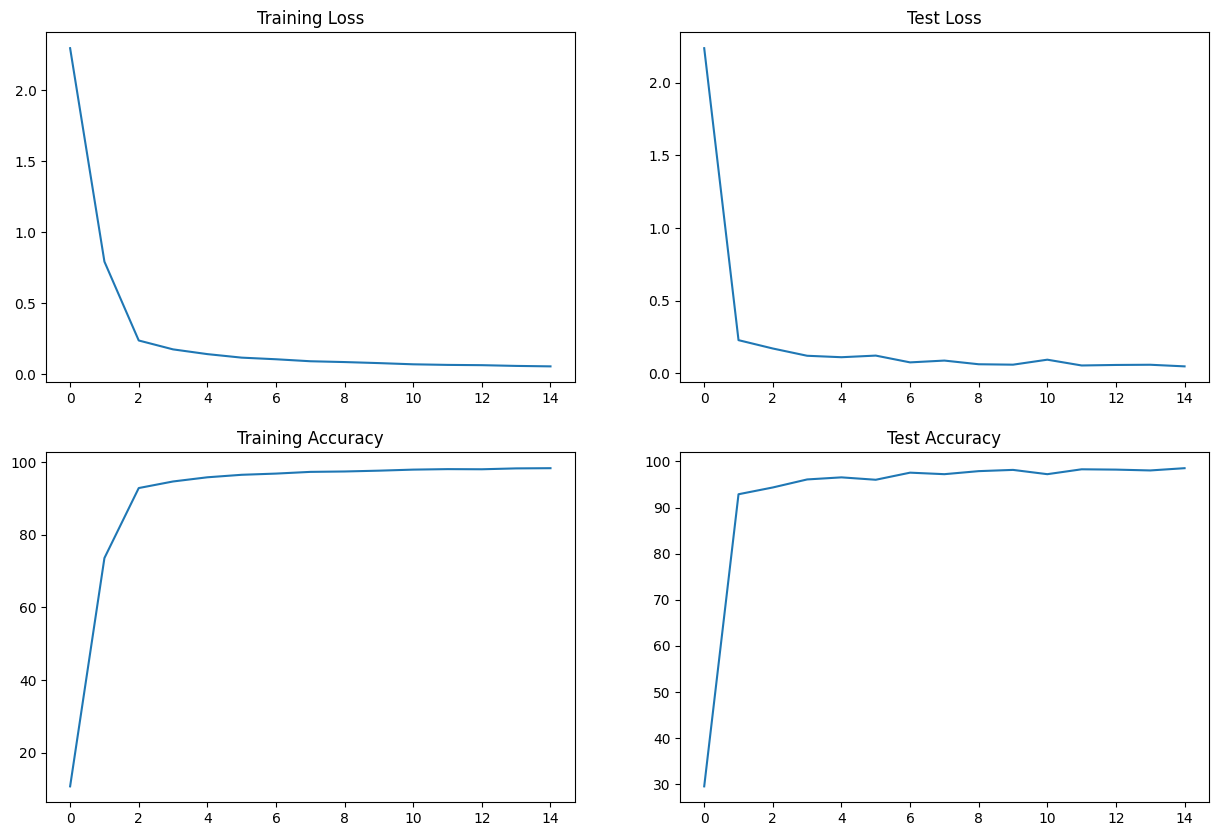

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  98.305
best test accuracy :  98.53


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.053780236094296455
best test loss :  0.04863440563082695
